# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60/60 - graded by MIT Professional Education Program (Applied Data Science Program)**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount google drive to colab worksheet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the current directory to current path
import os
path = '/content/drive/MyDrive/Colab Notebooks/MIT Applied Data Science/Data Science fundamentals/Python project'
os.chdir(path)
current_working_directory = os.getcwd()
print('Current working directory is changed to: ' + current_working_directory)

Current working directory is changed to: /content/drive/MyDrive/Colab Notebooks/MIT Applied Data Science/Data Science fundamentals/Python project


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# shape of the dataframe
df.shape

(1898, 9)

#### Observations:
The dataset has 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:   
*   4 columns of type integer: 'order_id', 'customer_id', 'food_preparation_time' and 'delivery_time'
*   1 column of type float: 'cost_of_the_order'
*   4 colums of type object: 'restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'. These will be categorical variables
* Note that from the sample data returned (top 5 columns), it seems that column 'rating' could have been an integer but was converted to object type because it contains mutiple strings of the value 'Not given'  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the dataset. we can confirm from the code above, but also had already a clue in the previous table, as the non-null count corresponded to the number of rows for all columns
* It's possible that the 'rating' column had missing values in the original dataset but if that's the case those were already treated.

In [ ]:
# Checking the 'rating' column further
df.rating.value_counts(normalize = True, dropna = False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# let's summarize the data, only columns containing numbers will be displayed.
# we transpose the output dataframe for ease of visibility
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The time it takes for food to be prepared once an order is placed is described by the variable 'food_preparation_time' according to our data dictionary
* The minimum of that variable is 20 minutes, maximum is 35 minutes, and mean is 27.37197 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# let's use value_counts() to check unique values of each category of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* The rating is described by the variable 'rating' according to our data dictionary, and non-rated orders will appear with the string 'Not given'
* 736 orders weren't rated. From our previous code above [code cell # 19], we also can add that this represents ~39% of orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
"""
let's be inspired by the content we learned during the Uber analysis use case.
we'll create functions for our plots, so it has the right information contained in it.
for continuous variables, we'll use both boxplots and histograms as they're complementary.
for categorical variables, we'll use countplots.
"""
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(# subplots here allows us to display both plots together
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)}, # size of the subplots grid
        figsize=figsize # figsize is used to make the figure larger as needed
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='light blue', palette="deep")
    # using palette to change the intensity of the colors

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins, color = 'skyblue')
    ax_hist.axvline(np.mean(feature), color='green', linestyle='--')  # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()


Univariate analysis for variable cost_of_the_order:



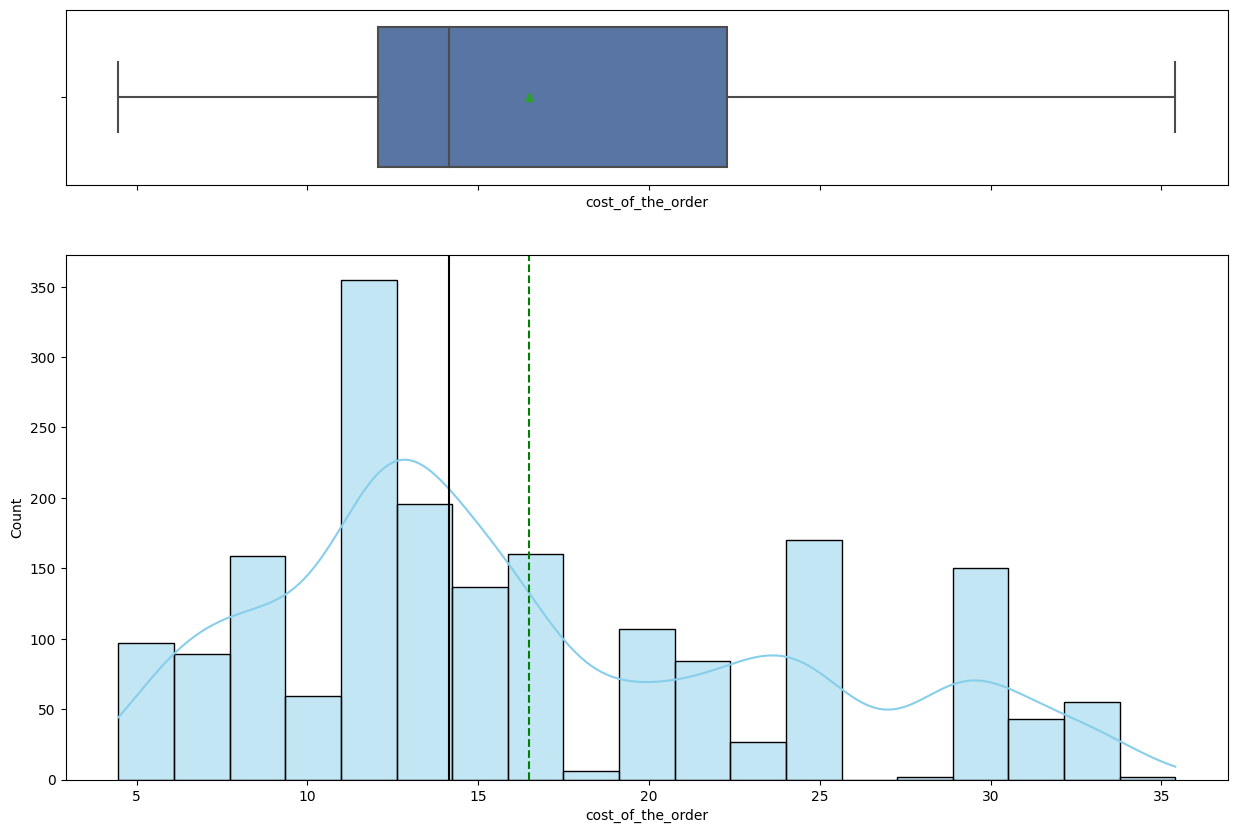


Univariate analysis for variable food_preparation_time:



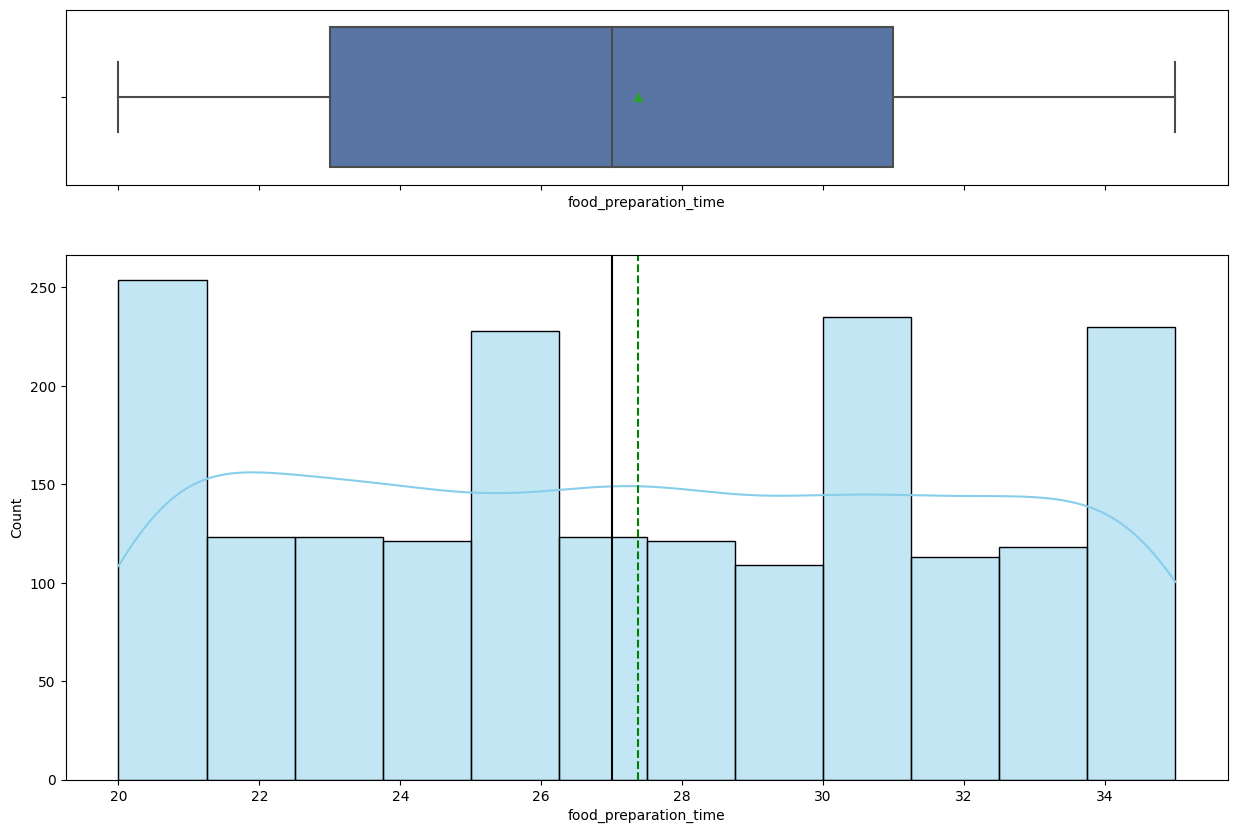


Univariate analysis for variable delivery_time:



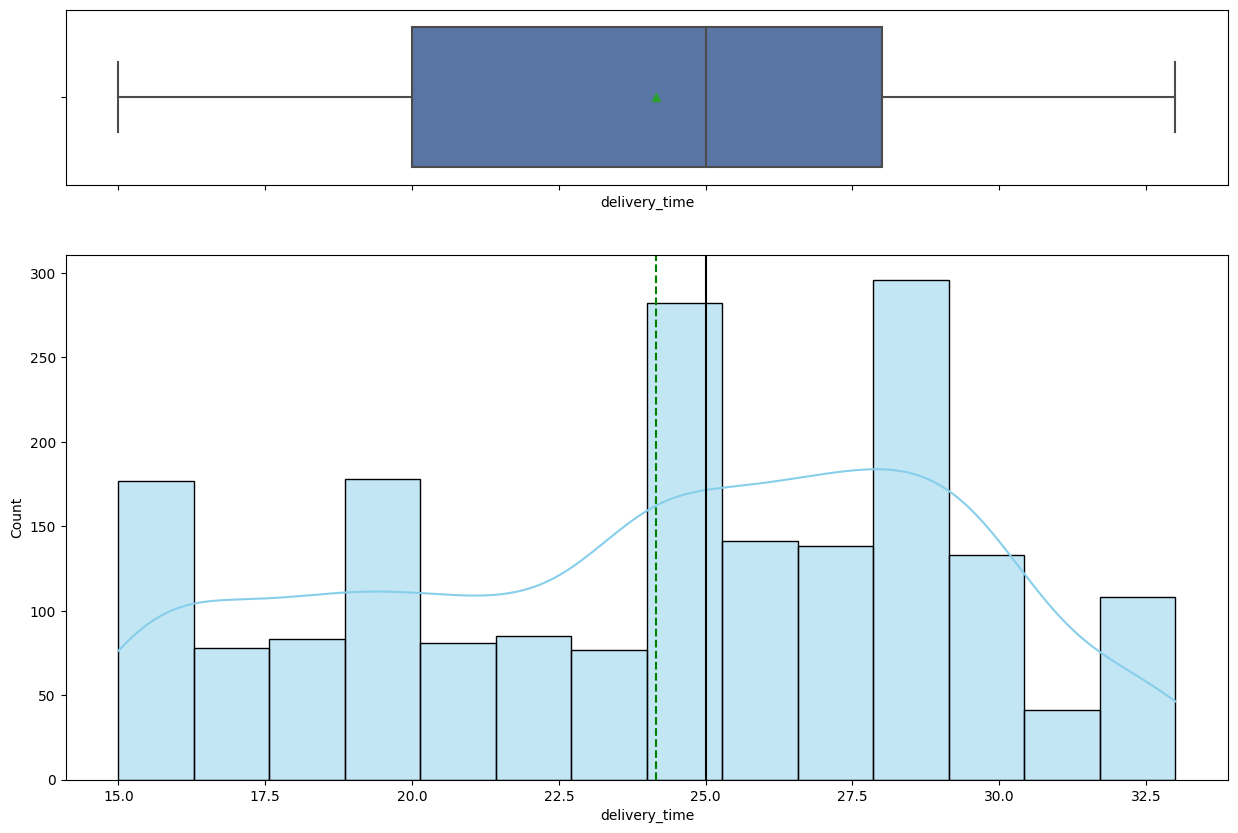

In [ ]:
"""
let's plot our continuous variables.
We decide to omit order_id and customer_id here as they're IDs
and won't have business value plotted for our analysis
"""
for columns in ['cost_of_the_order', 'food_preparation_time', 'delivery_time']:
  print('\n' + f'Univariate analysis for variable {columns}:\n')
  histogram_boxplot(df[columns])

#### Observations:
**Cost of the order:**
* The distribution of 'cost_of_the_order' is slightly rightly skewed
* The median and mean gravitate around ```$15``` (mean=```$16.5``` and media = ```$14.1```)
* There's an apparent mode in data at ```$12.5``` indicating that more customers tend to pay at that price, and around that price
* They're no outliers in the data
* The range of data is fairly narrow compared to how high meals' price in restaurants could go, with a minimum value at close to ```$5``` and a maximum price at around ```$35```

**food_preparation_time:**
* The distribution of 'food_preparation_time' is uniform  overall. We can still see peaks of prep times every 5 minutes at around 20, 25, 30 and 35 minutes.
* The mean and median are very close at around 27 minutes
* They're no outliers for this variable
* It'll be interesting to see how food prep time impacts the rating of the orders

**delivery_time:**
* Delivery time's distribution is leftly skewed, even though it's a slight observation
* There's a peak of orders gravitating at 28 minutes, which is high and probably means that our food delivery company allows for longer distance deliveries vs. local deliveries.
* The mean and the median are 24.1 and 25 minutes
* The delivery time will certainly impact the rating as longer deliveries means longer wait time, and potentially colder food when it arrives

In [ ]:
# displaying actual mean and median to have it handy above for our observations
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].agg(['min','max','mean', 'median']).T

,min,max,mean,median
cost_of_the_order,4.47,35.41,16.498851,14.14
food_preparation_time,20.00,35.00,27.371970,27.00
delivery_time,15.00,33.00,24.161749,25.00



The univariate analysis of categorical variable cuisine_type is: 



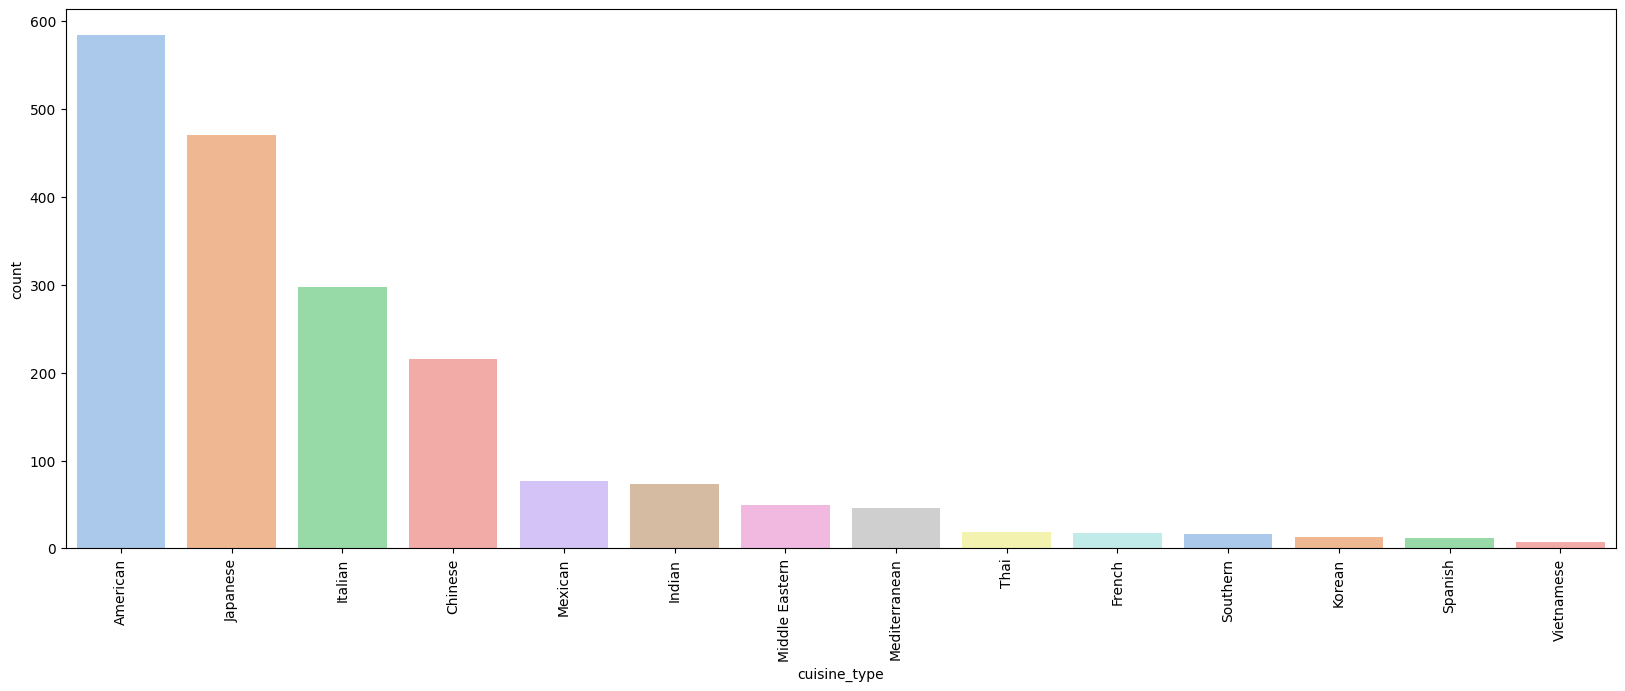


The univariate analysis of categorical variable rating is: 



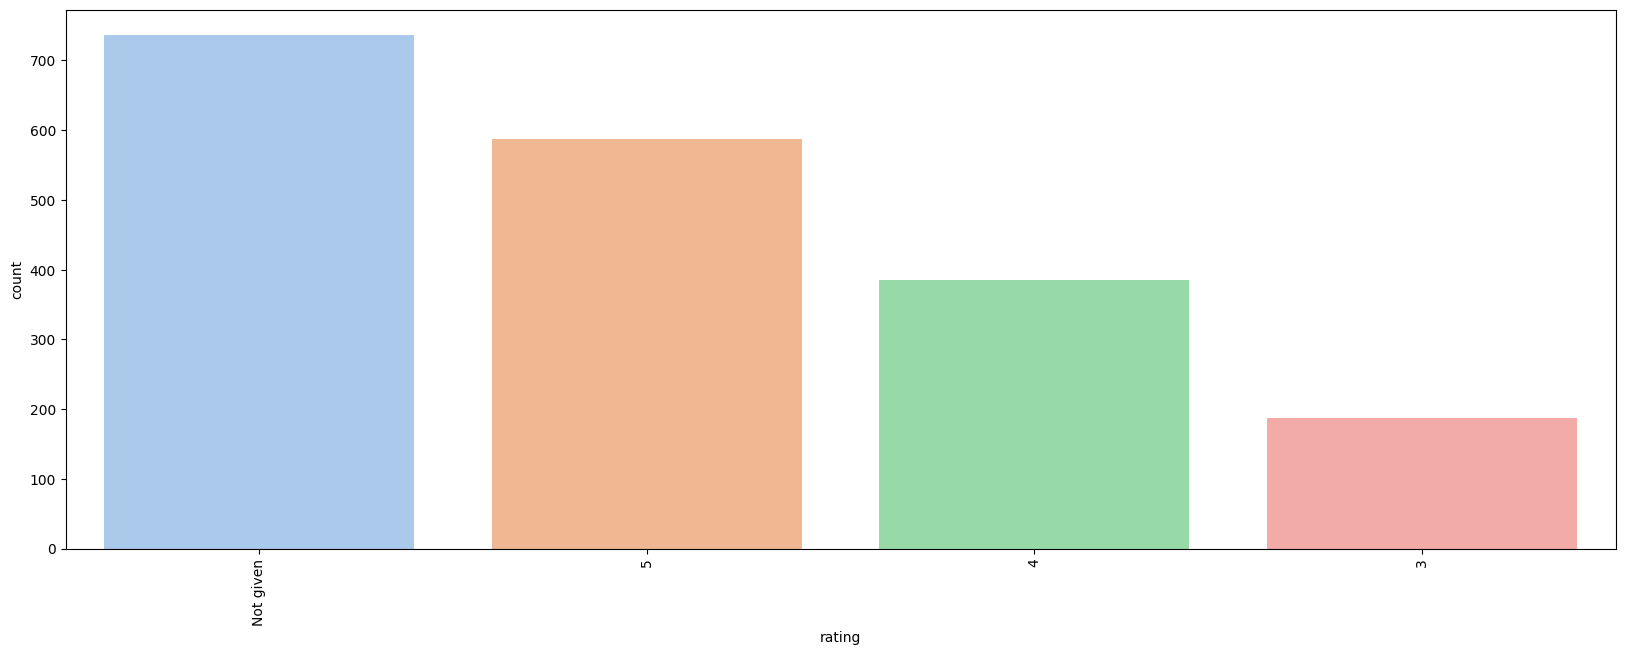

In [ ]:
"""
let's now plot our categorical variables
we'll use seaborn plot countplot()
"""
for columns in ['cuisine_type', 'rating']:#,'restaurant_name']:
  print('\n'f'The univariate analysis of categorical variable {columns} is:', '\n')
  plt.figure(figsize=(20,7))
  sns.countplot(data=df, x= columns, order = df[columns].value_counts().index, palette='pastel')
  plt.xticks(rotation=90)
  plt.show()

#### Observations:
**cuisine type:**
I'll regroup the food cuisine into 3 groups:
* The top group that's above 200 orders each and reaches at the maximum almost 600 orders includes American, Japanese, Italian and Chinese food that are most demanded by customers. These are by order of priority making American food the most wanted cuisine, which is probably expected as the analyzed country is America.
* In that top group, if combining Chinese and Japanese cuisine into Asian, we would even go above American, which shows the success of Asian cuisine in food deliveries
* Italian is a bit below expectations, as it is usually a very popular cuisine and it only represents half of the demand of American cuisine.
* In the second group of cuisine between 50 and 100 orders, we find Mexican, Indian, Middle Eastern and Mediterranean.
* Mexican is a bit surprising too as it's usually a popular choice of cuisine in the USA, it would be interesting to dig deeper with further data to understand if it's a choice of that company to partner with certain restaurants offering certain cuisine, or if it's real trend in food deliveries in NY.
* In the last group at below 30 orders, we find in order Thai, French, Southern, Korean, Spanish and Vietnamese that don't seem as popular choices chosen by the customers.

**rating:**
* Most orders are not rated, around 40% of them, which is the biggest category and a missed opportunity to understand what our customers think of our food delivery service. I would definitely alert the company to understand why the orders not rated are so high.
* Ratings otherwise are good, 31% of orders are rated at the highest score which is 5.
* 20% are then rated at 4, and around 10% at 3, showing opportunities to improve the service. It would be very interesting to conduct a survey and understand where we lost points for these orders (e.g., delivery time, food quality, etc...)
* When excluding non-rated orders, the mean is at 4.34/5 which is excellent (code show below)

In [ ]:
# Calculating the mean of ratings when excluding non-rated orders.
pd.to_numeric(df[df['rating']!='Not given']['rating']).mean()

4.344234079173838


The univariate analysis of categorical variable restaurant_name is: 



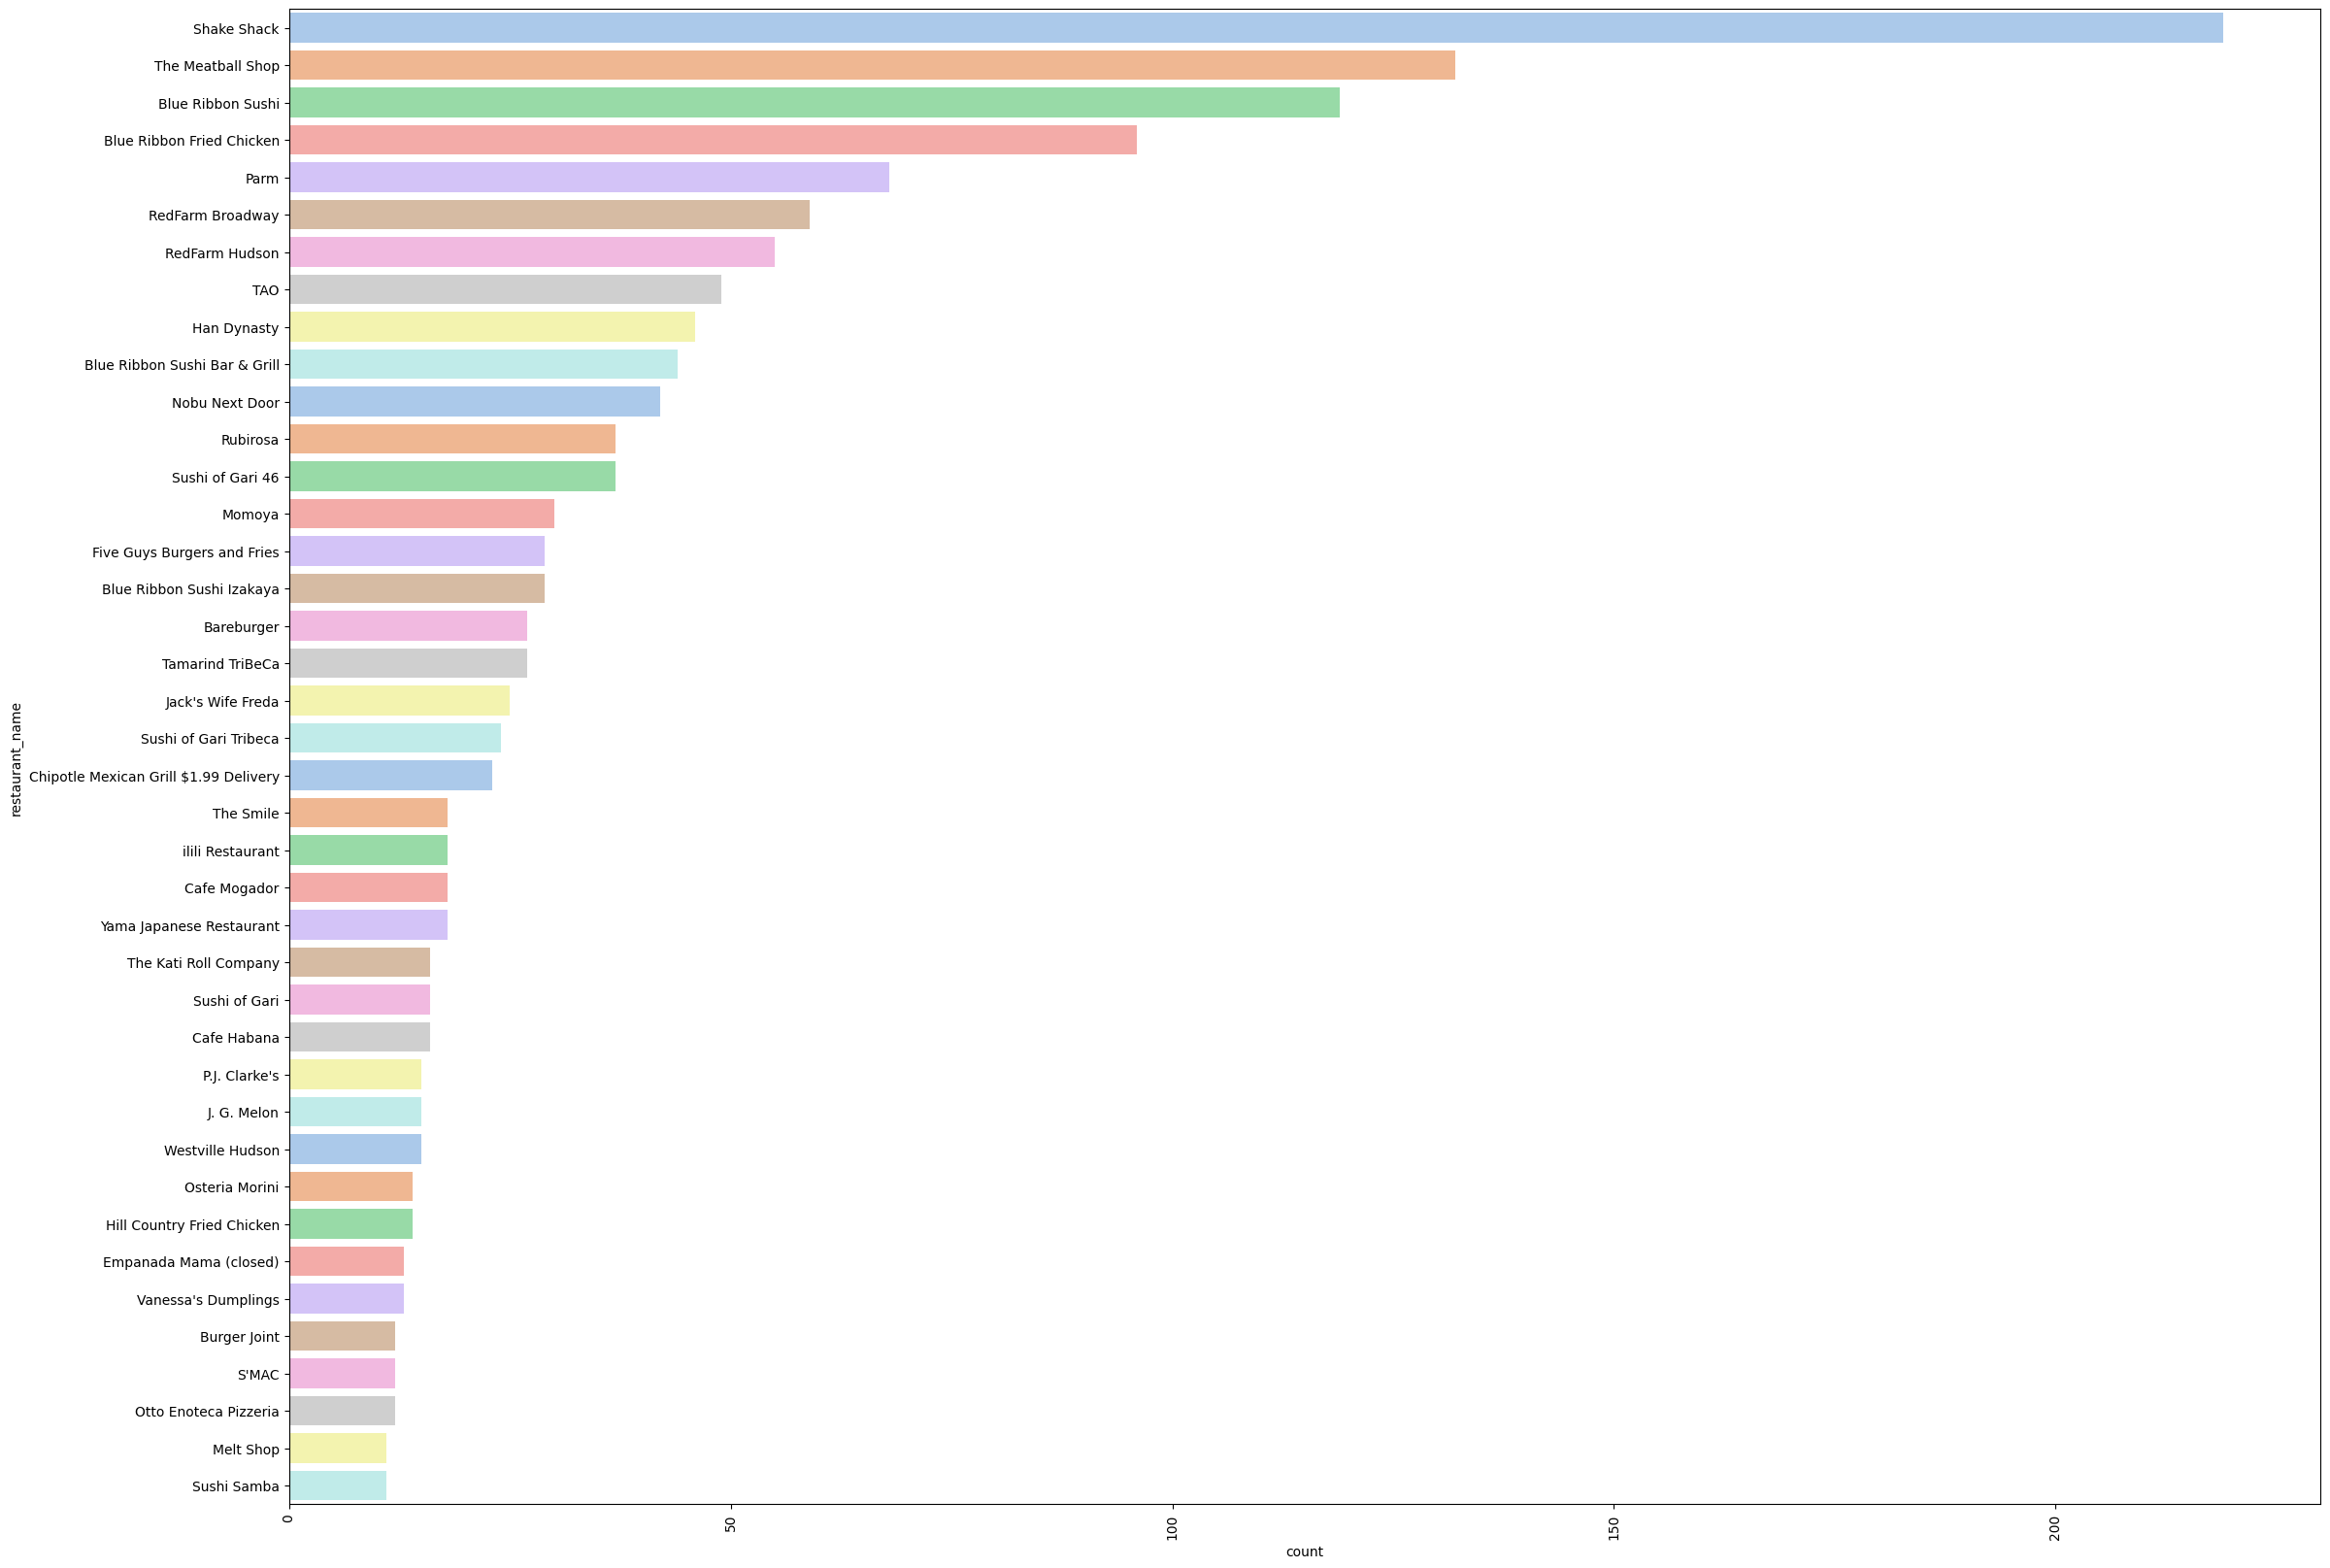

In [ ]:
"""
Since the restaurant_name variables has a lot of categories and plotting them in a countplot() is a bit confusing (see below),
we've decided to take a different approach here which is to display the top 10 restaurants for the top 9 cuisine types
In our previous analysis of cuisine types, that would correspond to group 1 and 2, plus Thai cuisine from group 3. (see next code cell)
"""
for columns in ['restaurant_name']:
  print('\n'f'The univariate analysis of categorical variable {columns} is:', '\n')
  plt.figure(figsize=(27,20))
  sns.countplot(data=df, y= columns, color = 'cuisine_type' ,order = df[columns].value_counts().iloc[:40].index, palette='pastel')
  plt.xticks(rotation=90)
  plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


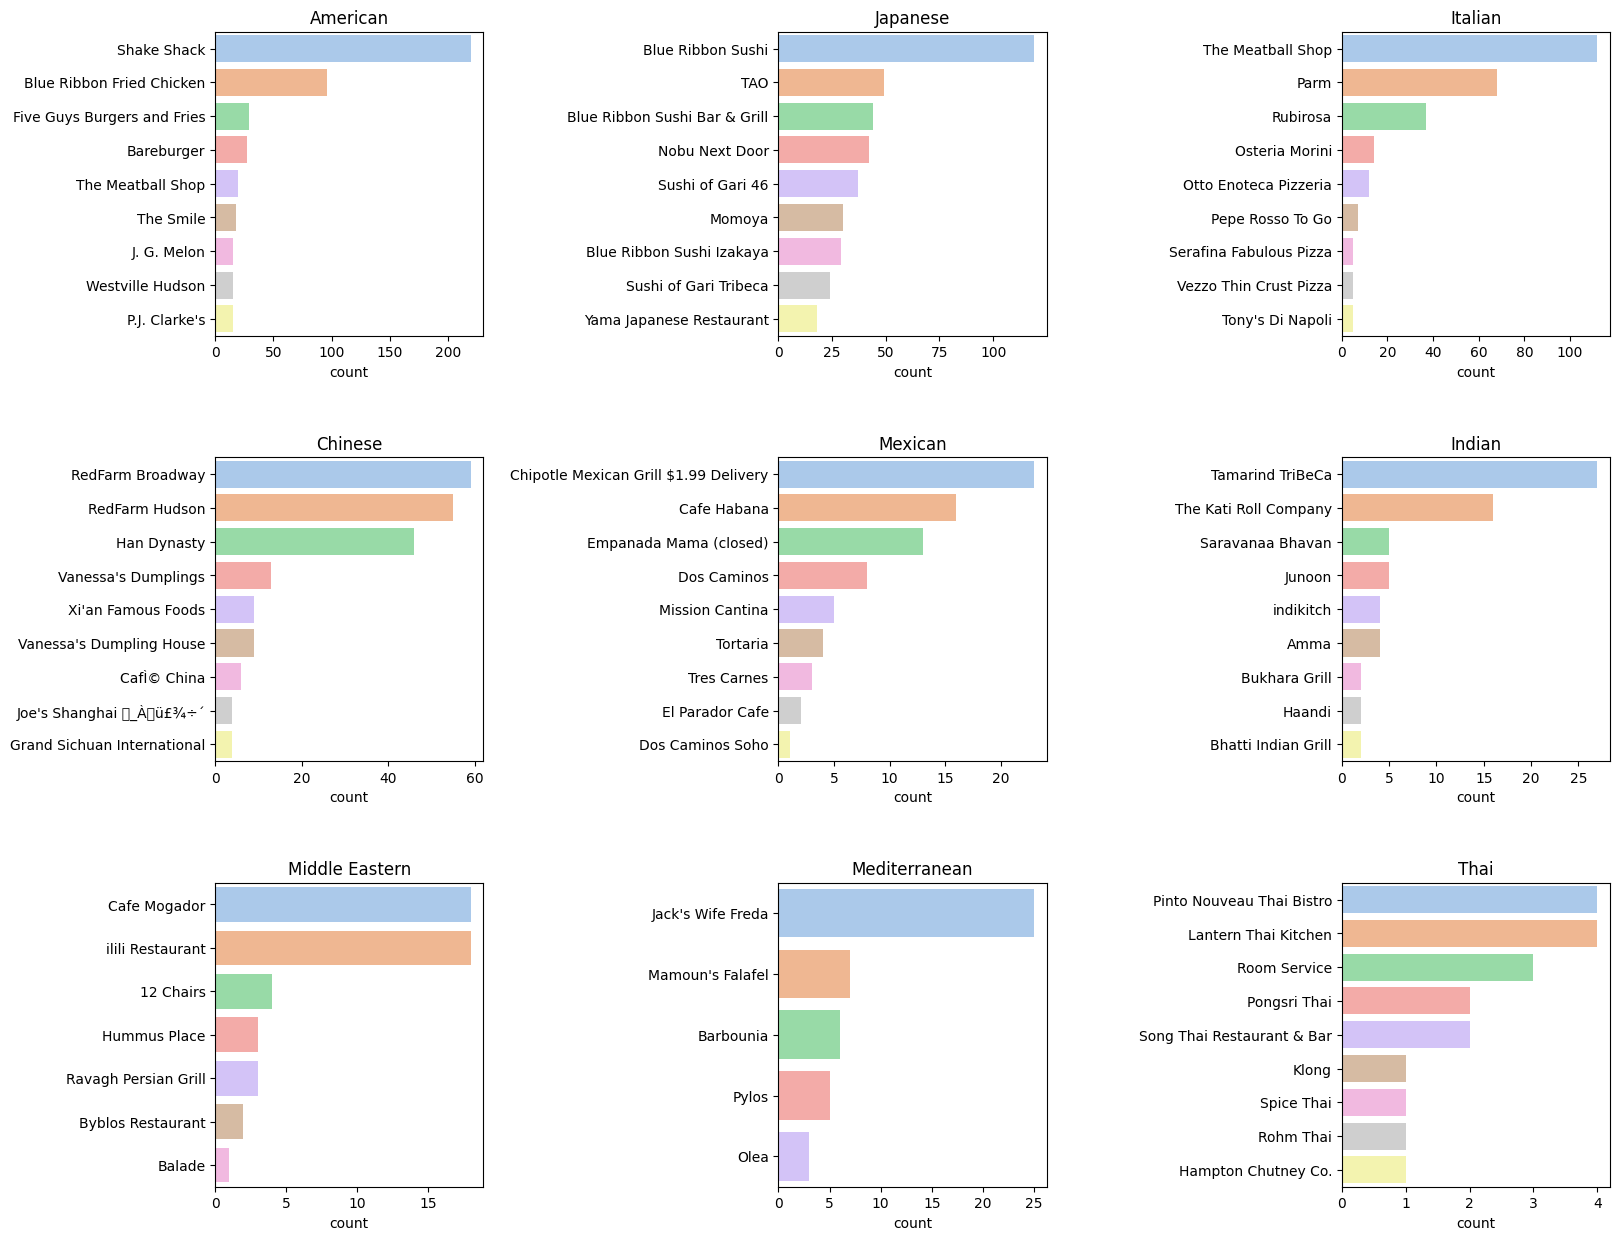

In [ ]:
"""
Let's now plot restaurant names with subplots and countplots instead
"""
fig, axes = plt.subplots(
        ncols = 3,  # Number of columns of the subplot grid
        nrows=3, # Number of rows of the subplot grid
        #sharex=True,  # The X-axis shouldn't be shared here, as each plot might have different x-values
        figsize=(18, 15) # figsize is used to make the figure larger as needed
    )

# set the spacing between subplots
plt.subplots_adjust(wspace=1.1,
                    hspace=0.4)

# create a dictionary d that stores dataframes with all restaurants for top 9 preferred cuisine types (i.e., American, Japanese, Italian, etc..)
d = {}
for index in df['cuisine_type'].value_counts().iloc[:9].index:
  d[index] = df[df['cuisine_type'] == index]['restaurant_name']

# add the countplots to the subplots grid
for keys, axes in zip(d.keys(), axes.reshape(-1)): # iterating over dictionary dataframes defined above and axes of the subplots simultenously to assign countplots to the the subplots grid
  sns.countplot(ax = axes, y=d[keys], order=d[keys].value_counts().iloc[:9].index, palette='pastel') # we still need to order each subplot by most popular to least popular using the order parameter
  axes.set_title(keys) # adding the cuisine type as a subtitle in each subplot
  axes.set_ylabel('') # removing the ylabel = "restaurant_name" of each subplot to improve clarity.

#### Observations:
**Restaurant name:**
* This grid of countplots is now much more intuitive as it regroups the franchises by type of cuisine, the fact we only kept the top 10 restaurant names is a choice, and we could increase at ease the parameter to more franchises if requested.
* The absolute #1 restaurant is the well-known fast-food gourmet burger franchise Shake Shack with more than 200 orders. Not surprisingly, for fast deliveries, Shake Shack is a perfect choice.
* In the Italian section, we have the Meatball Shop and in the Japanese the well-known Blue Ribbon Sushi that are both very popular restaurants with more than 100 orders each total.
* For the first group by type of cuisine, the top 3-4 restaurants are way ahead in terms of volumes of orders, which creates a big concentration of orders in some franchises: Shake Shack and Blue Ribbon Fried Chicken for American cuisine, Blue Ribbon Sushi + BR Sushi and Grill, Tao et.. This is good but also presents some risks in case some of these franchises decide to stop working with us.
* It is interesting to observe that the Middle Eastern and Mediterranean cuisines even though fairly popular, as being ranked #7 and #8 preferred cuisines, offer slightly less choice with respectively only 7 and 5 restaurants total. It would be important to monitor the evolution of the demand for these cuisines, in case they become more popular, it would make sense to sign new partnerships with more restaurants offering this type of cuisine

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# value_counts() will count orders by restaurant, and the iloc will let us filter on the top 5.
df['restaurant_name'].value_counts().iloc[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and parm.
* Shake Shack is the absolute favorite  restaurant, and it even surpasses The #2 favorite  restaurant by 66%.
* Blue Ribbon Sushi and Blue Ribbon Fried Chicken seem to be both from the Blue Ribbon franchise, I would verify this with the food company. If that's the case, it makes that franchise also a very solid player and important partner for us. We would want to strengthen our relationship with them.
* The Italian cuisine has two restaurants represented in the top 5, the meatball shop and Parm. Italian cuisine is always a favorite of households, so it's important to have restaurants in that category that seem to be pleasing our customers.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# create a crosstab between cuisine-type and day of the week, and filter on 'weekend' value
crosstab = pd.crosstab(df['day_of_the_week'], df['cuisine_type']).loc['Weekend'].sort_values(ascending = False)
print(crosstab)
# Let's extract the first index of our crosstab which corresponds to the most popular cuisine on weekends.
print('\n'+ 'the most popular cuisine on weekends is:', str(crosstab.index[0]))

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: Weekend, dtype: int64

the most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is American, which is also the preferred cuisine on weekdays and weekends combined.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# counting all orders and then orders that cost more than $20
total_orders = df['order_id'].count()
orders_above_20 = df[df['cost_of_the_order'] > 20]['order_id'].count()
orders_above_20/total_orders

0.2924130663856691

#### Observations:
29.22% of orders cost more than $20 which goes against expectation. Most orders are small orders and you would think probably that it is for one or two persons maximum, as that amount is too small otherwise.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# applying the mean() function to our column 'delivery-time'
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The mean order delivery time is 24.16 minutes which probably means that the food delivery company delivers in a broad area, and not just in a local neighborhood.
* With that kind of mean order delivery time, our food delivery company probably provides or requests (in case they're self-employed workers) delivery personnel to have an insulation bag to keep food cold/hot, and motorized vehicles


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# let's find the top 3 customers thanks to value_counts()
df['customer_id'].value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The top 3 customers in our dataset are customers with 'customer_id' equal to '52832', 47440' and '83287'
* These customers have respectively placed 13, 10 and 9 orders each
* The number of orders is fairly low when we know these are coming from the biggest customers of our dataset. It may be because the business is young, and building up its clientele, or it could also be an industry with a lot of churn. Something to keep monitoring as the business grows.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


Index(['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time',
       'delivery_time'],
      dtype='object')


<Axes: >

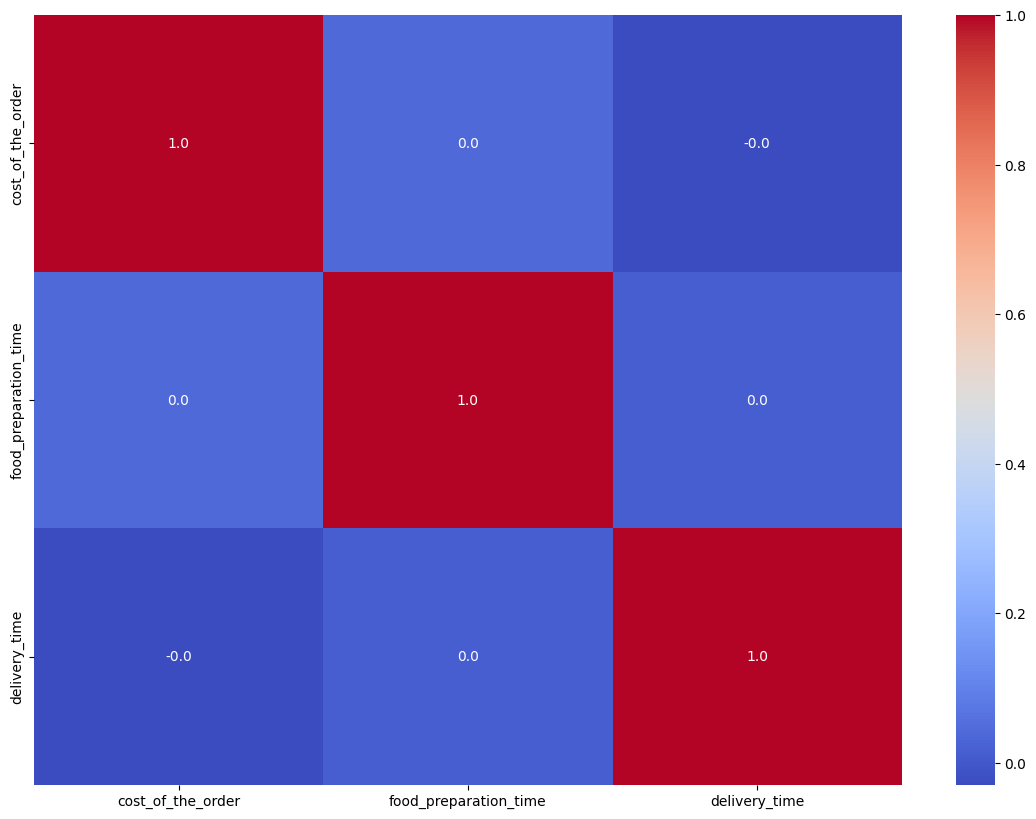

In [ ]:
# Let' start by Checking for correlation among numerical variables
# let's recall which are our non-object variables, thus numerical variables
print(df.dtypes[df.dtypes != 'object'].index)

# let's remove customer_id and order_id, which have no numerical business value other than identifying our customers
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

#### Observations:
* There's seem to be no correlation at all between our numerical variables, 'cost_of_the_order', 'food_preparation_time' and 'delivery_time'
* This is a logical conclusion, as 'cost_of_the_order' for instance shouldn't be related with 'food_preparation_time', it would depend more on parameters such as demand for the restaurant, complexity of the meal to prepare or cooking staff available at the restaurant.
* 'Cost_of_the_order' is also logically not correlated to the 'delivery_time' as that one depends on the delivery person, the distance, traffic congestion. Maybe if the tip amount was provided in a separate variable, we could find some correlation, due to higher motivation to deliver faster with a bigger tip.
* 'delivery_time' and 'food_preparation_time' are not correlated for the same reasons.

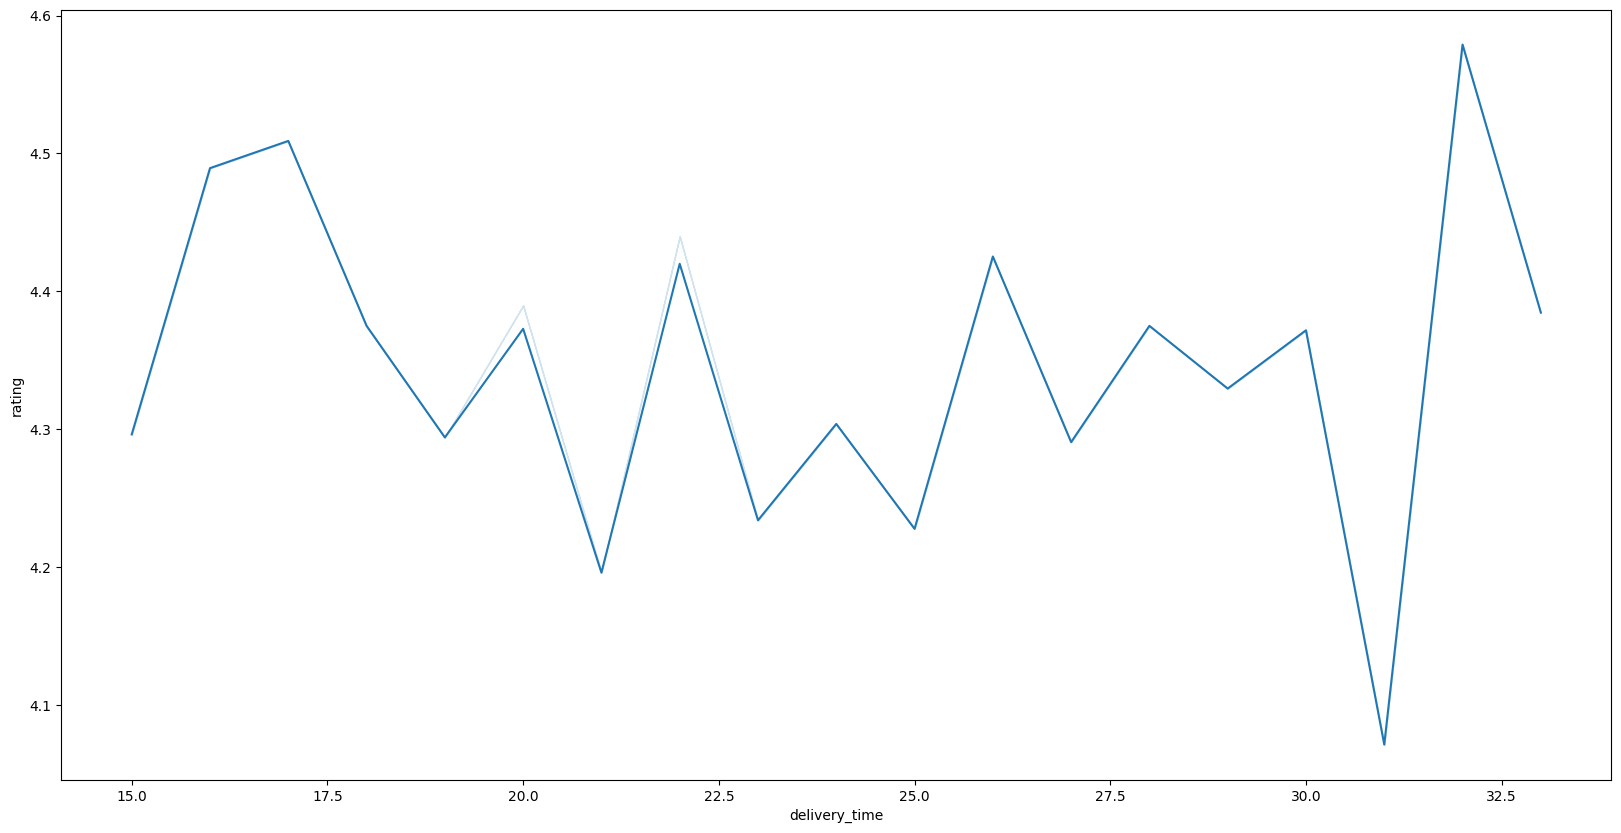

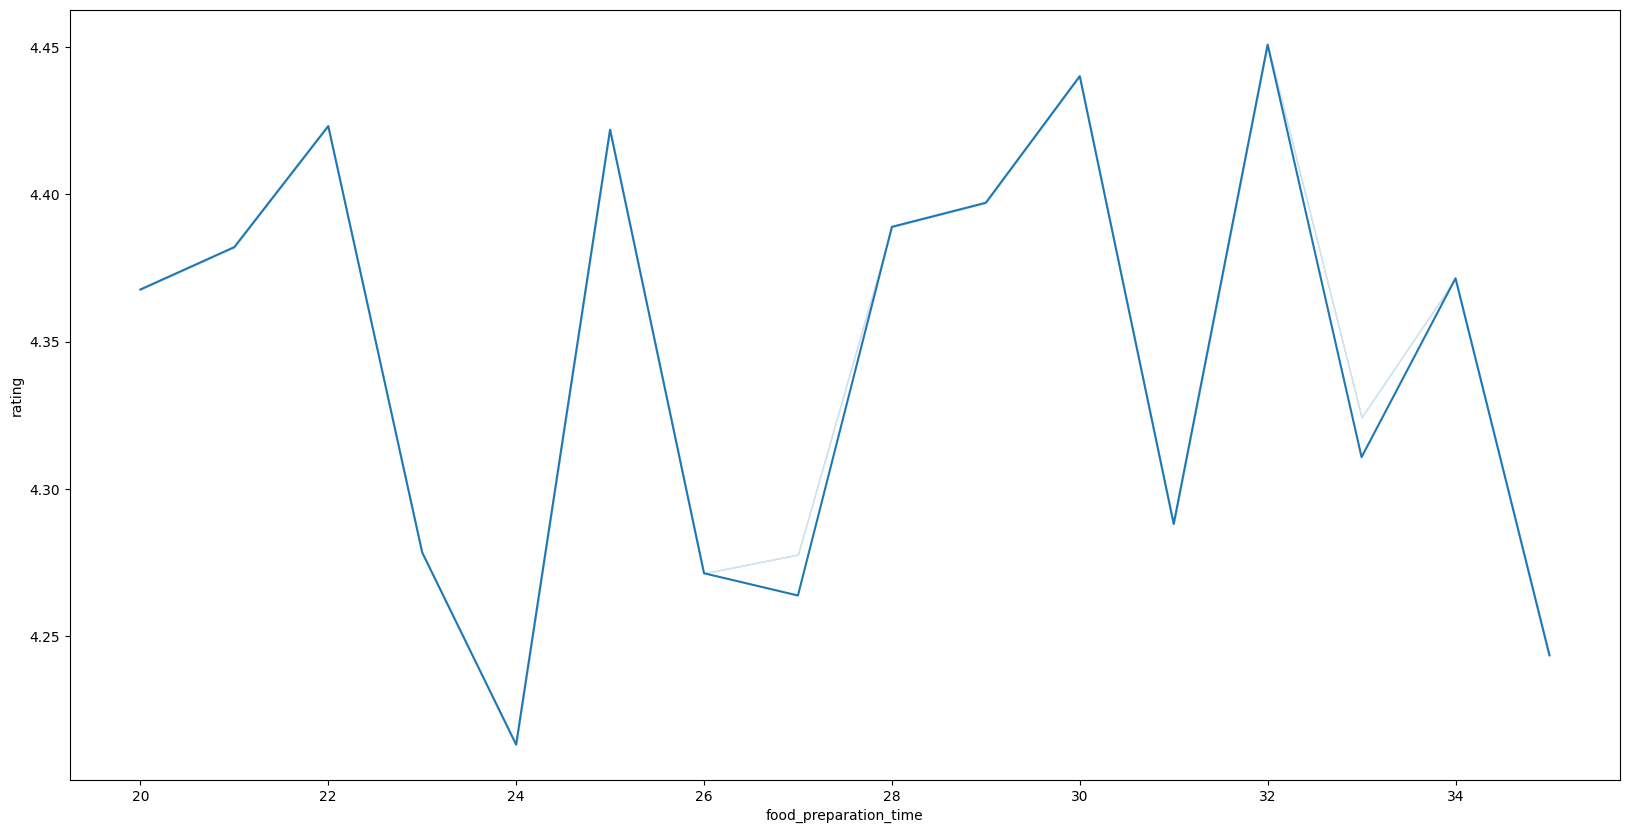

In [ ]:
"""
We want now to focus on the relationship between our numerical and categorical variables.
We have 4 categorical variables, retaurant_name, cuisine_type, day_of_the_week and rating

We remember the objective of the company is to get a fair idea about the demand of different
restaurants which will help them in enhancing their customer experience.

Let's start with ratings,

"""
# let's first create a slice of our dataset focused on ratings that are given (grades 3, 4 and 5)
df_rating = df[df['rating']!='Not given'].copy()
df_rating['rating'] = pd.to_numeric(df_rating['rating']) # let's convert our rating into an integer, so we can make statistical calculations
df_rating

plt.figure(figsize = (20, 10))
sns.lineplot(x='delivery_time', y='rating', estimator='mean', data=df_rating,errorbar=('ci', 0))
plt.ylabel('rating')
plt.xlabel('delivery_time')
plt.show()

plt.figure(figsize = (20, 10))
sns.lineplot(x='food_preparation_time', y='rating', estimator='mean', data=df_rating,errorbar=('ci', 0))
plt.ylabel('rating')
plt.xlabel('food_preparation_time')
plt.show()

#### Observations:
* This plot shows that there isn't a very clear correlation between ratings and delivery time or food preparation time
* A sort of intuitive assumption would be to think that higher delivery times lead to lower average ratings. But that's not necessarily the case here, many things can explain longer delivery time, such as distance, traffic and consumers are understanding when that's the case.
* Even though it's not fair to say longer food prep times make customer angry, it could still be the case. Customers usually don't like to wait too long even if the meal requires a longer time to cook. Anyways here the ratings don't seem impacted by the food preparation time, the line does fluctuate both up and down independently of the prep time.


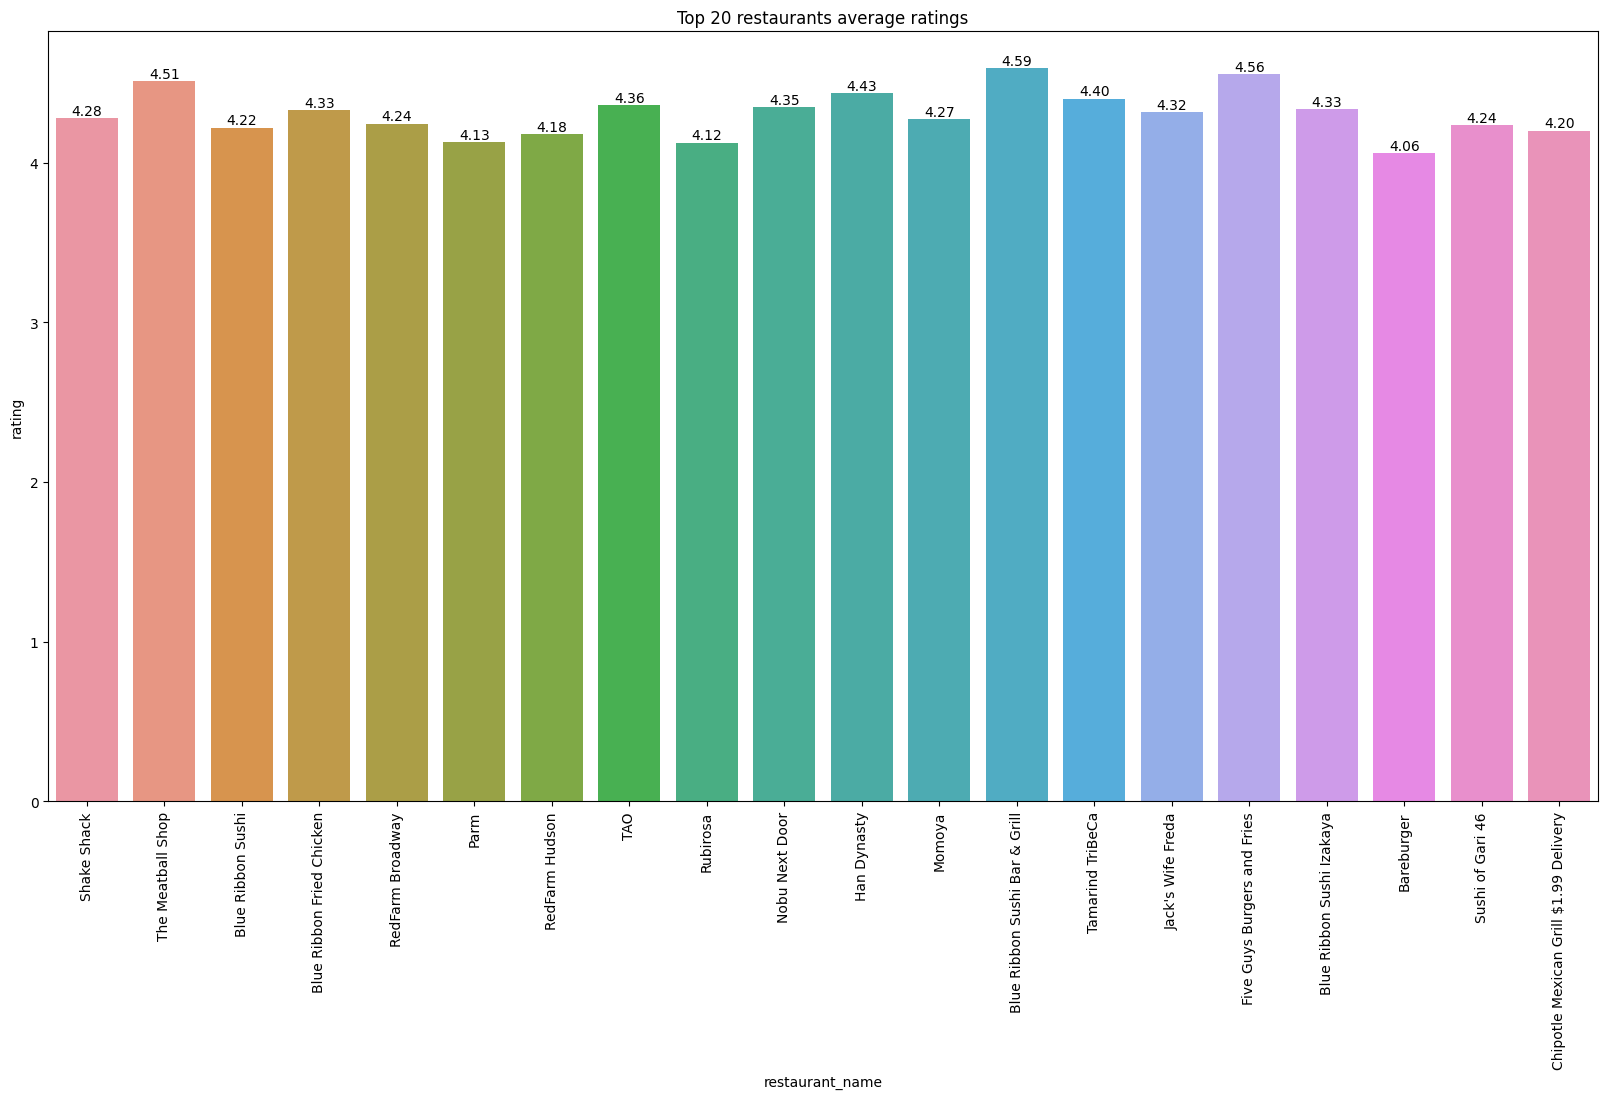

In [ ]:
"""
When it comes to ratings, a fair assumption would be that it varies depending on the restaurant.
Depending on the quality of the food, the franchise popularity, etc..
There's 178 unique restaurants which might be hard to plot on a single graph.
We decide to plot the top 20 restaurants which are the most popular and impactful in terms of the number of orders.
"""
# let's first create a slice of the dataframe with only the top 20 restaurants by number of orders
# let's create a list of the top 20 restaurants in our dataset
top_20_restaurants = df_rating['restaurant_name'].value_counts()[:20].index.to_list()
# let's use loc to slice the dataframe on these top 20 restaurants
df_top20 = df_rating.set_index('restaurant_name').loc[top_20_restaurants].reset_index().copy()
df_top20

plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90) # rotate the x_label so we can see it
plt.title('Top 20 restaurants average ratings') # add a title
ax = sns.barplot(x='restaurant_name', y='rating', data = df_top20, errorbar=None)

# Add values inside bars, so we can get the precise rating for each restaurant
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f') # round up to two decimals


#### Observations:
* This chart shows us the average rating for the 20 most popular restaurants. Even though all the numbers are above 4, which is satisfying, being at 4.0 or 4.5 makes a big difference.  
* It is interesting to see that not all restaurants provide the same level of satisfaction to our customers. For instance, Shake Shack has an average rating of 4.28 vs. the meatball shop that comes right after is at 4.51.
* Bareburger for instance is at 4.06 which is a bit low. The franchise is well known in New York, so why are customers not as satisfied? Is it because of the food quality, or the delivery service? It would be worth deep diving there to know more.
* As a comparison Five Guys has an excellent 4.56 rating, and a similar positioning to Bareburger (i.e., selling gourmet fast-food burgers), why is Five Guys doing better? It is important here to get more information to understand why.
* The absolute best rating in this list is for Blue Ribbon Sushi Bar & Grill, that gets a solid 4.59. Sushi being a difficult cuisine because it's raw fish, so the logistics are usually harder to keep the fish fresh, I would also follow-up with the customers ordering there, to understand what makes them so happy about this restaurant.
* Restaurants that have lower scores include Parm, Redfarm Hudson and Rubirosa. Even though these mean ratings are satisfying for now (i.e., above 4.1), I would keep monitoring ratings for these franchises to ensure they don't decrease over time. If the restaurants go down in ratings, it's likely that our brand delivering their food will also be perceived as bad.

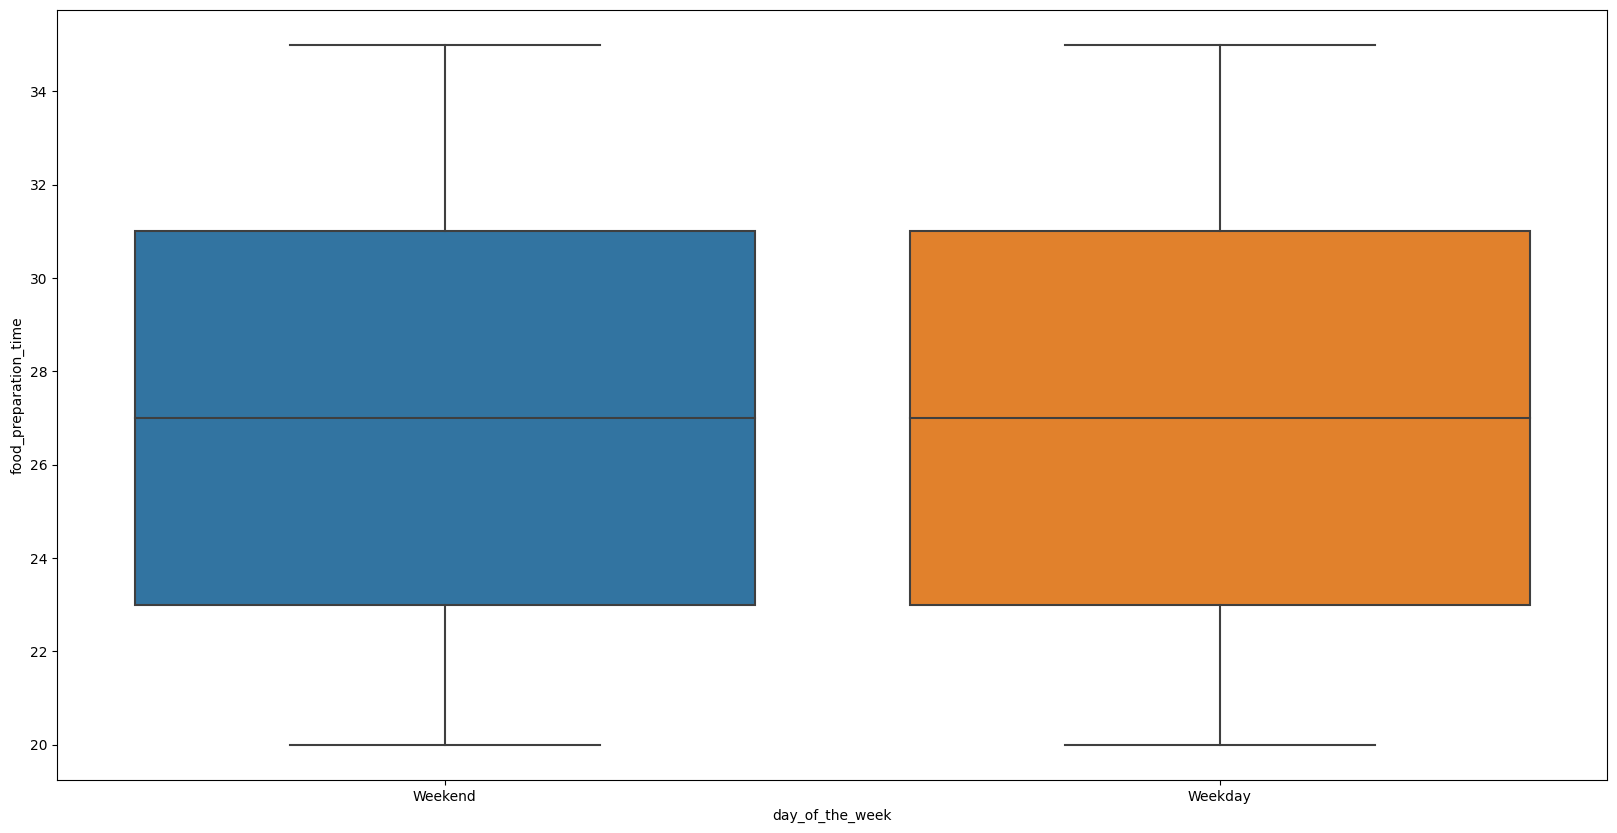

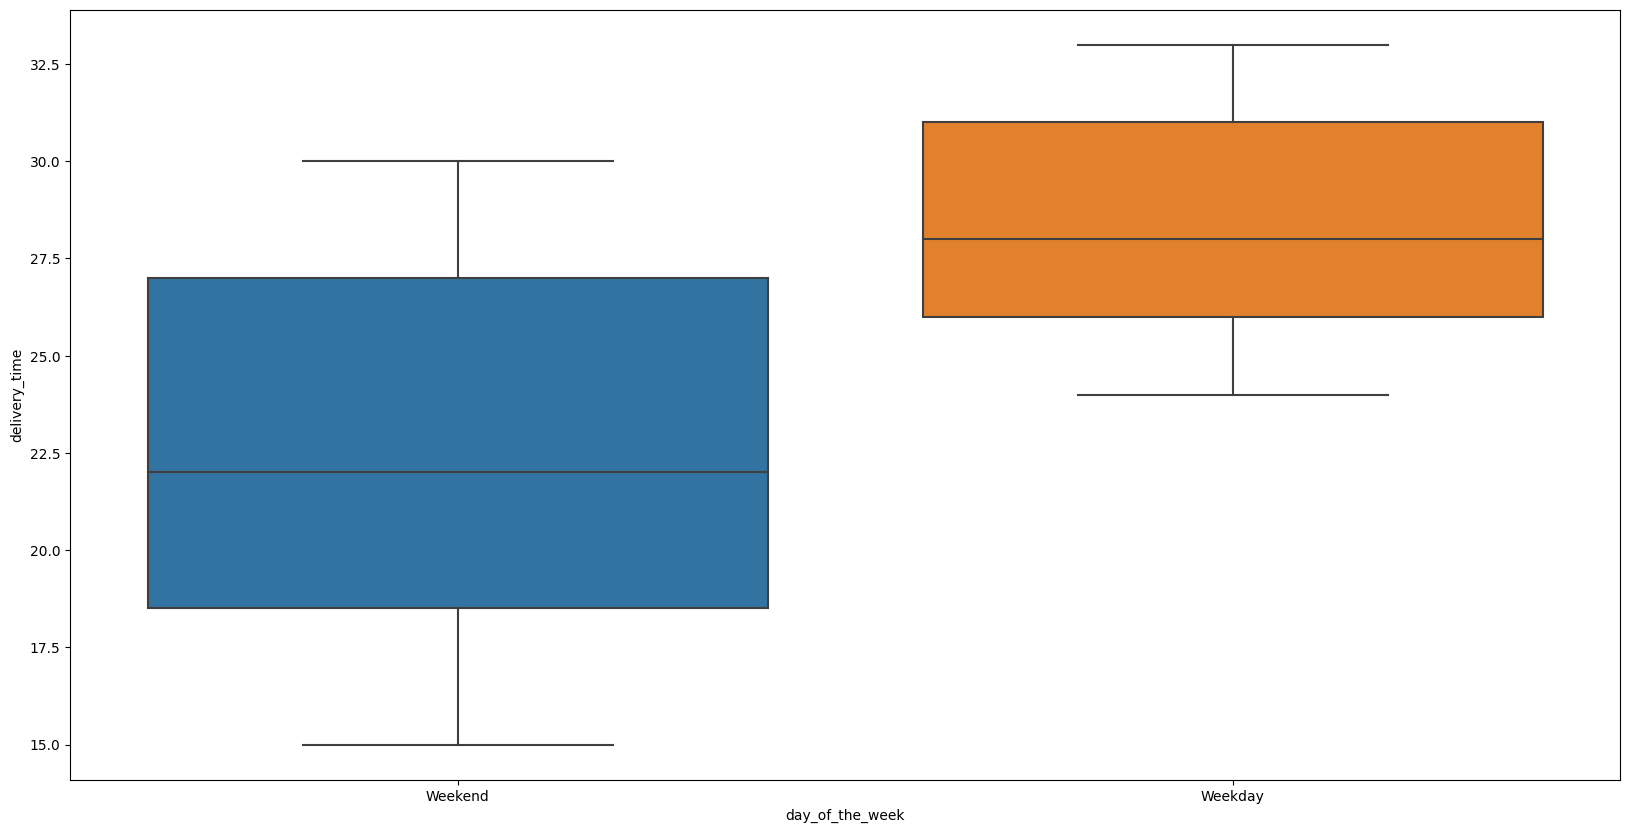

In [ ]:
"""
Let's focus now on delivery times in weekdays and weekends
"""

plt.figure(figsize = (20, 10))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.ylabel('food_preparation_time')
plt.xlabel('day_of_the_week')
plt.show()

plt.figure(figsize = (20, 10))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.ylabel('delivery_time')
plt.xlabel('day_of_the_week')
plt.show()

#### Observations:
* These boxplots show us that the spread of 'food_prepration_time' is evenly spread over weekdays and weekends with no major differences in the spread between weekdays and weekends. This means restaurants are able to ramp up their production capacity maybe by adding more cooks in the weekends to meet the likely higher demand.  
* It is 'delivery_time' where the spread is much higher in value in weekdays, with 75% of orders being higher than ~26 minutes on weekdays, when 75% of orders are actually delivered below ~26 minutes in weekends. This would require further investigation: it could be due to more traffic during the week, but we don't have this data.

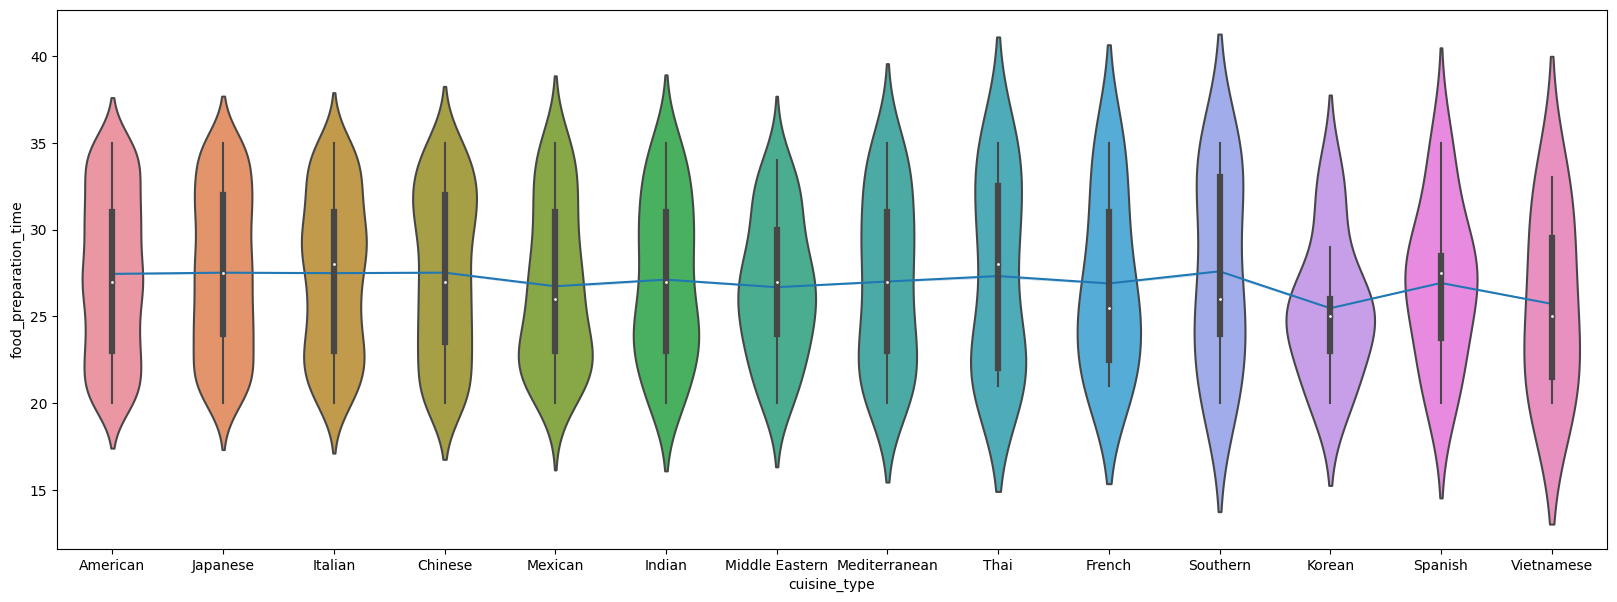

In [ ]:
# let's keep the order of cuisine type by most popular to least popular, so we can keep an order of importance, from left to right.
cats = df['cuisine_type'].value_counts().index
df.cuisine_type = pd.Categorical(df.cuisine_type, ordered = True, categories = cats)

fig, ax = plt.subplots(figsize = (20, 7))

# let's add the mean on the same graph as a lineplot
sns.lineplot(x = df.cuisine_type, y = df.food_preparation_time, estimator = 'mean', errorbar=('ci', 0), ax = ax)

# let's plot food prep time against cuisine_type
sns.violinplot(x = df.cuisine_type, y = df.food_preparation_time, ax = ax)

plt.show()

#### Observations:
* We see that American, Japanese, Italian and Chinese are more evenly spread out between 20 and 35 minutes, which likely depends on the type of food ordered, cooked or just salads/sushis/raw food.
* Some cuisines have a much bigger spread with an elongated violin shape, for instance Southern, Vietnamese and Thai, which can be explained by potentially a bigger number of meals offered that require very different prep times
* Overall, Korean and Vietnamese seem to have a lowest average food prep time, but we wouldn't emphasize that insight too much, as the difference with longest mean cooking times such as American or Souhtern is only a few minutes.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# we already did the work to slice the data only on ratings available, and convert strings to numeric
# this is our df_rating dataframe
# let's index it on the 'restaurant_name'and create a copy of our original df_rating so we don't modify the original dataframe
df_rating_indexed = df_rating.set_index('restaurant_name').copy()
# let's create two filters, one for restaurants with more than 50 ratings
filt_50_ratings = df_rating_indexed.index.value_counts()>=50
# the other one with more than 4 ratings
filt_4_ratings = df_rating_indexed['rating']>=4
# we can then join these two tables to find the list of restaurants respecting both conditions
# we're interested in unique values and the index as we're looking at restaurant names
print(pd.merge(df_rating_indexed.loc[filt_4_ratings],df_rating_indexed.loc[filt_50_ratings],how='inner', on='restaurant_name').index.unique())
# we reset the index so the code can be run multiple times without error
df_rating_indexed.reset_index(inplace=True)

Index(['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


#### Observations:
* There are 4 restaurants that have more than 50 ratings and at the same time an average rating of more than 4.0: Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi, The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# our approach here will be to create a new column called revenue
# let's first define the logic described above in a function
def percentage_applied(cost):
  if cost>=5 and cost<20:
    return cost*0.15
  elif cost>=20:
    return cost*0.25
  else:
    return 0

# let's now create our new column and apply this function
df['revenue'] = df['cost_of_the_order'].apply(percentage_applied)
df['revenue'].sum()

6166.303

#### Observations:
* The company generated $6,166.303 across all orders
* That is assuming (afer confirming with program team) that orders with a cost of 5 dollars (inclusive) didn't generate any revenue, and that above 20 dollars (inclusive), percentage applied to costs is 25 ```% ```, and excludes the 15 ```% ``` applied to orders which cost is above 5 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# we first create a column that sums delivery time and food prep time
df['total_order_time']=df['food_preparation_time']+df['delivery_time']
# let's create a dataframe with one single column that tells us if that delivery time is above 60 minutes (True) or not(False)
# the normalize parameter gives us a percentage which is what we're looking for
(df[['total_order_time']]>60).value_counts(normalize=True)

total_order_time
False               0.894626
True                0.105374
dtype: float64

#### Observations:
* 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed
* This number seems quite high, as one hour is a long time to wait for your meal. I assume that would need to be further improved and investigated.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# there's different ways of doing this, but let's use the groupby function in pandas in our case
df_weekday_weekend = df.groupby(by='day_of_the_week')
df_weekday_weekend['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
* The delivery time is of 28.34 minutes on weekdays, and 22.47 minutes on weekends
* This was already highlighted in a previous plot, but it's a very interesting insight. The reason why the delivery time goes significantly up on weekdays needs to be understood.
* Reasons could be more traffic during weekdays, decreased amount of available delivery person during weekdays which in turns means the person is more likely to be far from the restaurant pickup, or just harder to get selected as more competition arises to get the delivery person. All this reasons would increase the delivery time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
We analyzed a dataset of 1898 orders from New York. The dataset provided additional information on these orders such as customer ID, day of the week the order is placed, delivery and food preparation time, cuisine type, restaurants as well as ratings.

Based on the food delivery business model, it is natural to want reduced delivery times as much as possible as customers want their food fast and fresh. Ratings are an important variable to understand customer satisfaction. The variety of restaurants and cuisine types is also important as customers usually want choice when it comes to selecting their meal, and they want to see the restaurants or franchises they like. Finally weekly seasonality is key, as weekends and weekdays can affect demand and supply as well as traffic which in turn impacts delivery time. Thus, we looked all these variables into details and concluded that:



1.   The food preparation time is fairly uniform across cuisine types and restaurants. We could also see some differences in preparation time depending on the type of cuisine which is expected and would depend on the meal's complexity to prepare.
2.  The delivery time is around 24 minutes on average. It goes significantly up during weekdays vs. weekends. In addition, more than 10% of orders take more than 60 minutes total to get to the households once the order is placed.
3. The type of cuisine proposed is well varied with 14 different types of cuisines. The American, Japanese, Italian and Chinese are the most popular in terms of total orders placed (that's also the case on weekends). Shake Shake and Blue Ribbon franchises are the most popular in terms of orders placed on our platform.
4. The ratings overall are solid with a total average of 4.34 over 5 across all ratings provided. The top 20 of our best performing restaurants in terms of total orders placed are also very well rated, all above 4.0. Some are closer to 4, such as Bareburger, Parm, Redfarm Hudson, and Rubirosa. The percentage of ungraded orders is very high at around 40%, which in turn explains why only 4 restaurants have more than 50 ratings.
5. Almost 70% of orders cost less than $30 which goes against expectation, and means our orders are probably usually small and also ordered in smaller households, one or two max.
6. The top 3 most frequent customers have only made 9 to 13 orders, who will be eligible for a 20% discount voucher.
7. The food delivery company made a total revenue of 6,166.303 dollars which is based on different percentages retained on the cost of the order.  

### Recommendations:

*  The food delivery time goes up on weekdays, which should be monitored and investigated. For now, delivery time doesn't seem to be meaningfully impacting our ratings but this could change in the future.
* The type of cuisine is well diversified. Surprisingly the Italian cuisine which is a usual household favorite, is only the 3rd favorite cuisine. That could be because of the type of clients we're appealing too, or maybe because our choices of Italian restaurants are not appealing. As a reminder, Parm and Rubirosa which are our top restaurants have ratings closer to 4, which is good but below average.
* The ratings are overall solid, but I would keep monitoring the lower rated restaurants, including the Italians mentioned above and Bareburger that is the lowest rated restaurants in our top 20 most popular. If restaurants are poorly rated, eventually that will impact our brand image.
* Ratings' completion is too low at 60%, the food delivery company needs to improve this KPI, to increase the significance of the ratings collected, and adjust the strategy if needed. methods such as providing incentives or just improving the survey delivery method should be tested.
* It seems based on the cost of the order that we're appealing to smaller households, maybe one or two, which is understandable intuitively. This could be students, couples and roommates that don't want the hassle of cooking for only one or two people. This could be further confirmed with additional customer surveys and could help us adjust our media strategy to acquire more customers.
* Our top customers order frequency is low, or below expectation. This could be because the company is young, or because the churn is high in the industry. It is a competitive market, but controlling churn is vital to continue growing the company in a healthy way.
* the total revenues are still small, so we could think of creative ways of finetuning our percentage applied to orders so we can generate more revenues. Different things could be tested such as higher percentages for bigger orders, charging orders below 5 dollars, etc.

---